In [ ]:
# 🌞 Week 2 – Solar Energy Prediction Model (Plant 1)

# **Objective:**
# Train a machine learning model to predict solar energy output (DC Power) using weather data from Plant 1.

# **Tasks Covered:**
# 1. Load preprocessed data
# 2. Split into training and testing sets
# 3. Train regression models
# 4. Predict solar energy output
# 5. Compare predicted and actual values
# 6. Check model accuracy


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully")


Libraries imported successfully


In [ ]:
from google.colab import files
print("Upload Plant_1_Preprocessed.csv")
uploaded = files.upload()

data = pd.read_csv("Plant_1_Preprocessed.csv")
print("Data loaded successfully!")
data.head()


Upload Plant_1_Preprocessed.csv


Saving Plant_1_Preprocessed.csv to Plant_1_Preprocessed.csv
Data loaded successfully!


,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7116151.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6339380.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7007866.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6782598.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [ ]:
# Selecting weather features as inputs (X) and DC_POWER as output (y)
X = data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = data['DC_POWER']

print("Features and target variable selected")


Features and target variable selected


In [ ]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Data split completed")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


 Data split completed
Training samples: 55022
Testing samples: 13756


In [ ]:
# Using Linear Regression for prediction
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [ ]:
# Predict DC Power for test data
y_pred = model.predict(X_test)

# Compare first few predictions
comparison = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print(" Actual vs Predicted values:")
display(comparison)


 Actual vs Predicted values:


,Actual,Predicted
0,0.000000,98.465219
1,0.000000,68.729755
2,7349.428571,6936.197918
3,0.000000,40.659687
4,7951.000000,7749.098336
5,0.000000,84.993528
6,0.000000,73.748384
7,5658.428571,5950.602333
8,1014.857143,997.236746
9,3808.500000,3802.917535


In [ ]:
# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score (Accuracy): {r2:.4f}")


Model Evaluation Results:
Mean Absolute Error (MAE): 266.22
Mean Squared Error (MSE): 345096.71
R² Score (Accuracy): 0.9786


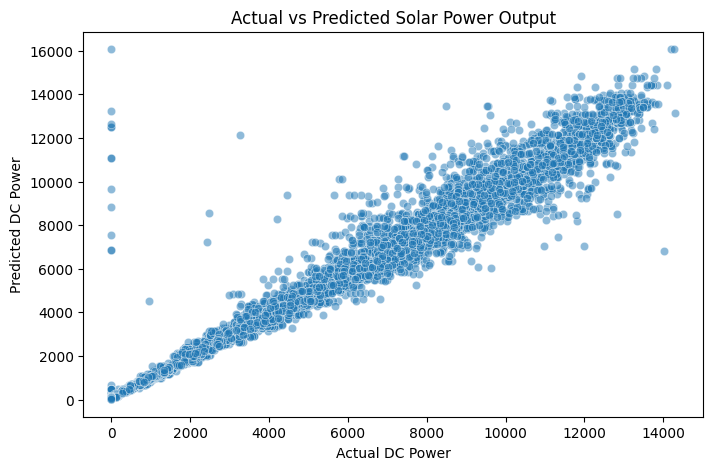

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual DC Power")
plt.ylabel("Predicted DC Power")
plt.title("Actual vs Predicted Solar Power Output")
plt.show()
